# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">1 - Introduction</a></li>
<li><a href="#questions">2 - Question</a></li>  
<li><a href="#wrangling">3 - Data Wrangling</a></li>
<li><a href="#eda">4 - Exploratory Data Analysis</a></li>
<li><a href="#conclusions"> 5 - Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1 - Introduction

This project will examine a dataset from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. It will also take a look to these characteristics to identify trends or any other valuable insight.

### Dataset Description

> * ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> * ‘Neighborhood’ indicates the location of the hospital.
> * ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> * Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Data Sources

*The dataset used in this analysis was downloaded on the April 30, 2020*

**Name:** No Show Appointments</li>
<ul>   
    <li><b>Definition</b>: No Show Appointments</li>
    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">No-show-appointments</a></li>    
    <li><b>Version</b>: 2</li>
</ul>

<a id='questions'></a>
## 2 - Questions

The following analysis will take a look on the following questions:
><ol>
>    <li><p>What is the overall appointment show-up vs. no show-up rate?</p></li>   
>    <li><p>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</p></li> 
></ol>

<a id='wrangling'></a>
## 3 - Data Wrangling

> Before we start to analyze this data, the data has to be wrangled and cleaned into a format which can be analyzed. At first, the needed libraries will be imported.

### General Properties

In [1]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Load the data and print some lines
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for NAs
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Check for duplicates
sum(df.duplicated())

0

In [7]:
# check for outliers
df.groupby('Age').Age.count()

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

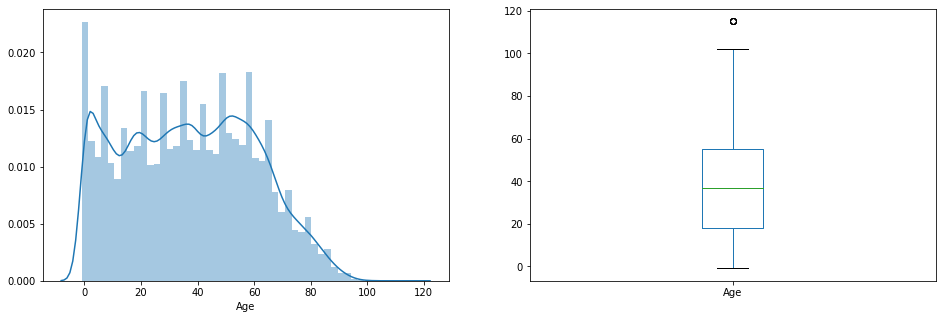

In [8]:
# Plot Age Distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))

plt.show()

In [9]:
# Count outliers (negative values and values higher than 100)
df.query('Age < 0 | Age > 100').count()

PatientId         8
AppointmentID     8
Gender            8
ScheduledDay      8
AppointmentDay    8
Age               8
Neighbourhood     8
Scholarship       8
Hipertension      8
Diabetes          8
Alcoholism        8
Handcap           8
SMS_received      8
No-show           8
dtype: int64

There are some outliers that requires attention, there is onbe patient with -1 and 7 patients older than 100 years.

In [10]:
# Display Outlier records
df.query('Age < 0  | Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning

><ol>
>    <li><p>Some typos and Spanish words were identified in 3 columns</p></li> 
>    <li><p>ScheduledDay and AppointmentDay shall be formated to datetime</p></li> 
>    <li><p>No Show column is not numeric</p></li> 
>    <li><p>There are 8 records listed as outliers, these records will be removed from the analysis</p></li>
></ol>

In [11]:
# 1 - Fix typos
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [12]:
# 2 - Convert columns to datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
# 3 - Convert no show column to numeric Yes=1 and No=0
showed = df[df['No_show']=='Yes']
not_showed = df[df['No_show']=='No']

In [14]:
# 4 - Remove outliers
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [15]:
# Check outlier removal
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: Age, Length: 101, dtype: int64

In [16]:
# check for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110519 non-null float64
AppointmentID     110519 non-null int64
Gender            110519 non-null object
ScheduledDay      110519 non-null datetime64[ns, UTC]
AppointmentDay    110519 non-null datetime64[ns, UTC]
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
No_show           110519 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [17]:
# check quantity of persons that showed up vs. who didn't
df.No_show.value_counts()

No     88203
Yes    22316
Name: No_show, dtype: int64

<a id='eda'></a>
## 4 - Exploratory Data Analysis

### 1 - What is the overall appointment show-up vs. no show-up rate?

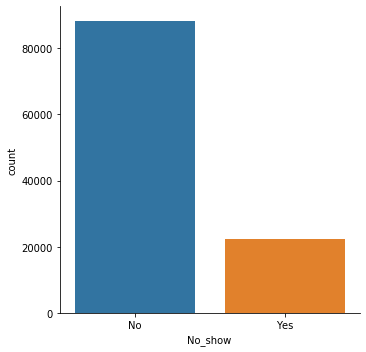

In [40]:
# Factor plot of those who showed vs. who didn't
sns.factorplot('No_show', data=df, kind='count')

20.19200318497272


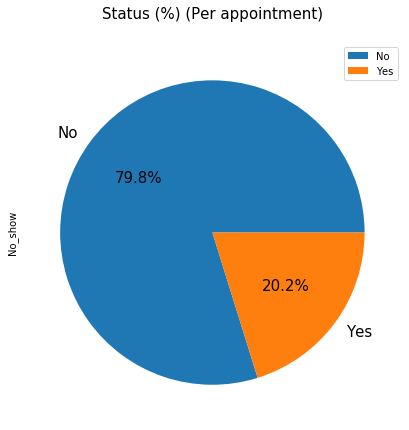

In [19]:
allP = df['No_show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 15);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

There are 88,203 persons that showed up for the appointment (79,8%) and 22,316 persons that didn’t showed up for the appointment (20,2%).

###  2  - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

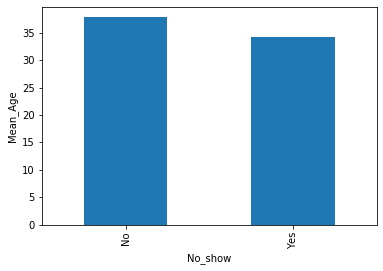

In [20]:
# Is there any Age difference in having a patient to be with status Show / No- Show?
fig, ax = plt.subplots()
df.groupby('No_show')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

The mean age group of instances with "NoShow = Yes" have lesser age

In [35]:
# What is the gender distribution
df.Gender.value_counts()

F    71832
M    38687
Name: Gender, dtype: int64

35.00484079660511


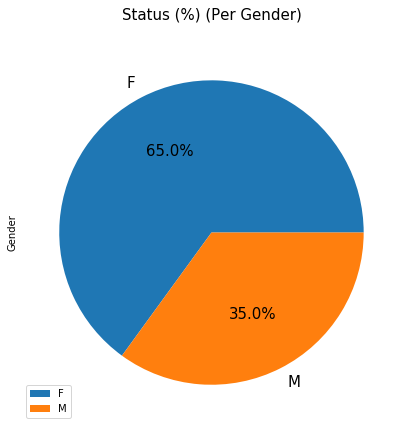

In [21]:
# What is the gender proportion
allP = df['Gender'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 15);
pieChart.set_title("Status" + ' (%) (Per Gender)\n', fontsize = 15);
plt.legend();

There are 71,832 (65%) female patients and 38,687(35%) male patients.

In [24]:
# Define plot function for colnames with status Show / No- Show?
def plot_data(colname):
  sns.factorplot(colname, data=df, kind='count', col='No_show',aspect=1.25, size=5)
  return plt.show()

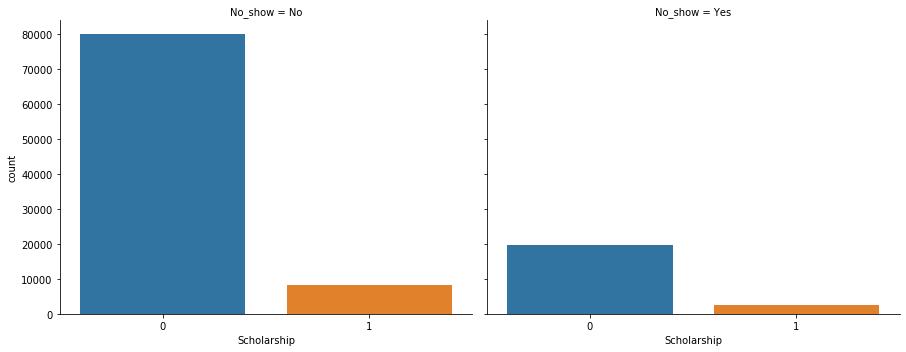

In [27]:
# Is there any Gender difference in having a patients grouped by Scholarship with status Show / No- Show?
plot_data('Scholarship')

There is no difference in patients enrolled in the scholarship program to showed up for the appointments.

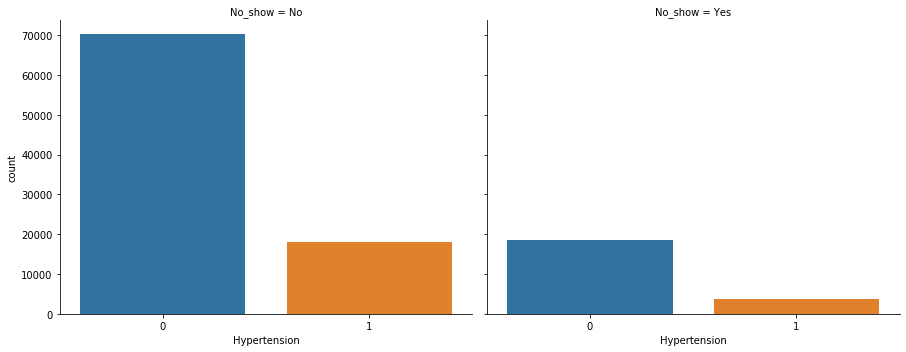

In [26]:
# Is there any Gender difference in having a patients grouped by Hypertension with status Show / No- Show?
plot_data('Hypertension')

There is no difference in patients with hypertension to showed up for the appointments.

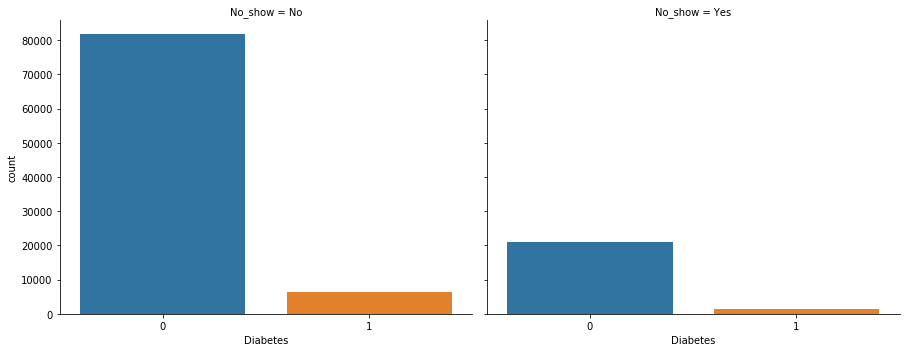

In [28]:
# Is there any Gender difference in having a patients grouped by Diabetes with status Show / No- Show?
plot_data('Diabetes')

There is no difference in patients with diabetes to showed up for the appointments.

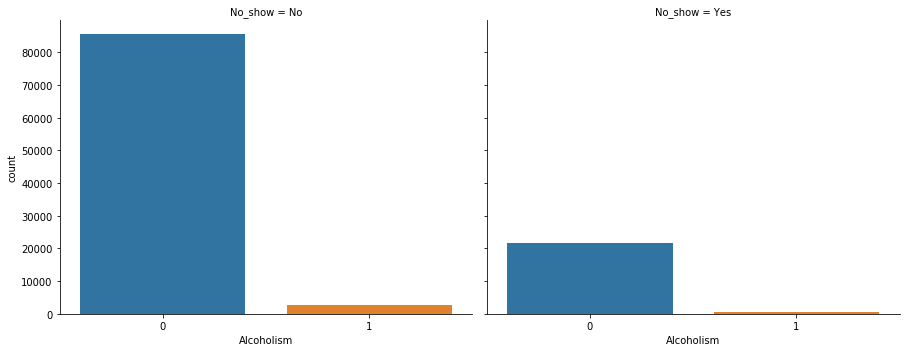

In [29]:
# Is there any Gender difference in having a patients grouped by Alcoholism with status Show / No- Show?
plot_data('Alcoholism')

There is no difference in patients with alcoholism to showed up for the appointments.

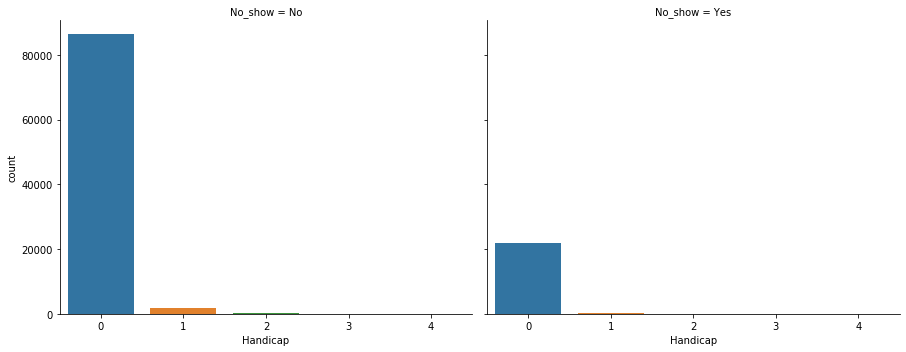

In [30]:
# Is there any Gender difference in having a patients grouped by Handicap with status Show / No- Show?
plot_data('Handicap')

There is no difference in patients with handicap condition to showed up for the appointments.

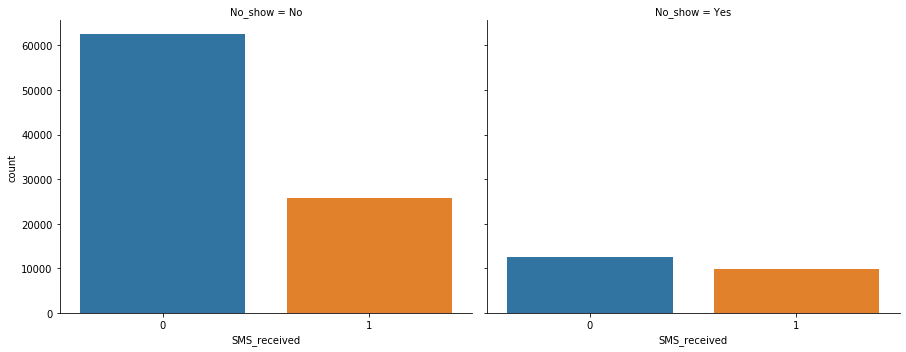

In [31]:
# Is there any Gender difference in having a patients grouped by Received SMS with status Show / No- Show?
plot_data('SMS_received')

There is no difference in patients that received a SMS reminder to showed up for the appointments.

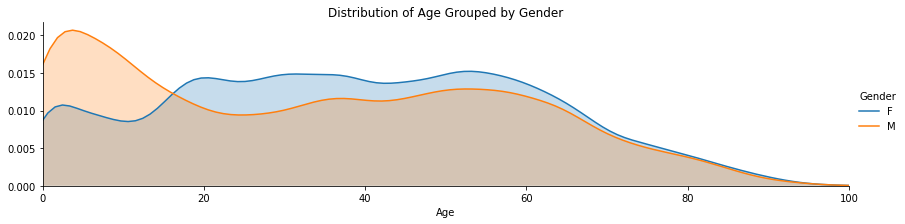

In [32]:
# Is there any Age difference in having a patients distributed by Gender
fig = sns.FacetGrid(df, hue='Gender', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

The age distribution shows that a higher quantity of males are younger than 20 years.

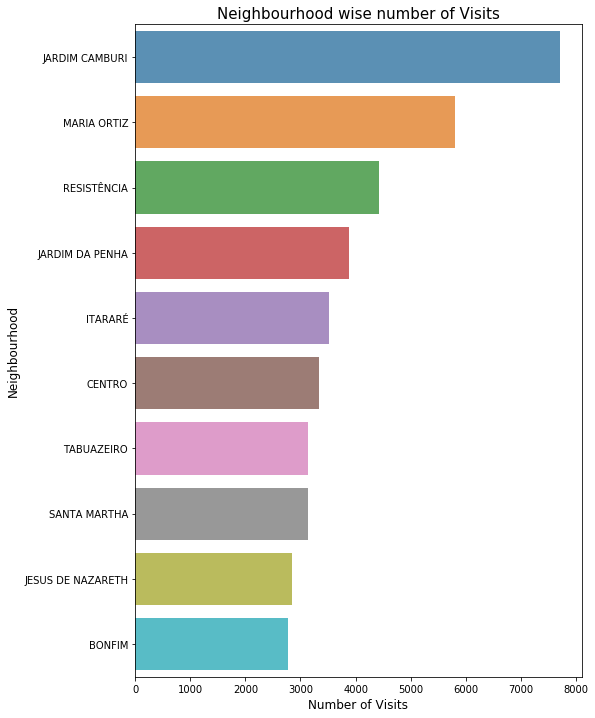

In [33]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

The number of visits are more from the area - Jardim Camburi

<a id='conclusions'></a>
## 5 - Conclusions

><ol>
>    <li><p>There are 88,203 persons that showed up for the appointment (79,8%) and 22,316 persons that didn’t showed up for the appointment (20,8%).</p></li> 
>    <li><p>The mean age group of instances with "NoShow = Yes" have lesser age</p></li> 
>    <li><p>The gender proportion is 65% of females and 35% of males</p></li> 
>    <li><p>There are persons enrolled in the scholarship that didn’t showed up for the appointment</p></li>
>    <li><p>The number of visits are more from the area - Jardim Camburi</p></li>
>    <li><p>Alcoholism was not identified as roadblock to showed up to the appointments, since lesser quantities are observed in patients that didn't showed up.</p></li>
    >    <li><p>In general there are no differences to dtermine a tendency to showed up to appointment by shcolarship, diabetes, hypertension, handicap or SMS reminders</p></li>
></ol>

### Limitations

><ol>
>    <li><p>There is no data about the neighborhood population to get a patient proportion coming from specific areas</p></li> 
>    <li><p>Three months of data is not enough to provide a clear picture a full year can provide a better picture</p></li> 
>    <li><p>There are over 3500 patients with zero age, this must be explained in the data set in order to determine the appropriate cleaning steps</p></li> 
>    <li><p>An additional column is required with the quantity of SMS reminders sent to identify a tendency in regards the quantity of SMS requires to convice the patients to attend the appointment </p></li>
>    <li><p>Patient severity will be beneficial to determine if people with advanced deceases tends to attend the appointments</p></li> 
></ol>